In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
raw_image=Image.open("pic1.png")
image_total=np.array(raw_image)
# image_total=(np.array(raw_image)-np.mean(np.array(raw_image)))/255
print(image_total)
plt.imshow(image_total,cmap="gray")

FileNotFoundError: [Errno 2] No such file or directory: 'pic1.png'

In [ ]:
image_array=np.zeros((4096,64))
# image_ave=np.zeros((4096,64))
t=0
step=8
for i in range(0,512,step):
    for j in range(0,512,step):
        image_array[t]=image_total[i:i+step,j:j+step].reshape(1,64)
        # image_ave[t]=(image_array[t]-np.mean(image_array[t]))
        t+=1
print(image_array)


[[142. 142. 141. ... 139. 137. 138.]
 [144. 141. 141. ... 135. 133. 132.]
 [137. 136. 141. ... 134. 132. 133.]
 ...
 [ 63.  61.  57. ...  33.  33.  38.]
 [ 38.  37.  41. ...  53.  56.  62.]
 [ 43.  39.  46. ...  84.  86.  90.]]


In [ ]:
rate=0.0000000001
echo=1000
w=np.random.randn(1,64)
Y=np.zeros((4096,1))
# z=np.zeros((1,64))
for i in range(echo):
    Y=np.dot(image_array,w.T)
    w=w+rate*(np.dot(Y.T,image_array)-np.dot(Y.T,Y)*w)
print(w)
print(Y)

[[-0.1237546  -0.12421871 -0.12478194 -0.12508295 -0.12543432 -0.1255401
  -0.12522852 -0.12491016 -0.12396972 -0.12442452 -0.1249861  -0.12544596
  -0.12569088 -0.12572918 -0.12539457 -0.12504836 -0.1241539  -0.12473316
  -0.12518908 -0.12564408 -0.12573945 -0.12567382 -0.12541502 -0.12499124
  -0.12437226 -0.12500438 -0.12543492 -0.1256185  -0.12574609 -0.12568503
  -0.12536731 -0.12487629 -0.12437852 -0.12516731 -0.12539267 -0.1254477
  -0.12562277 -0.12549236 -0.12514553 -0.12471861 -0.12444427 -0.12491459
  -0.12509964 -0.12515553 -0.1251548  -0.12521172 -0.12507519 -0.12469456
  -0.12425706 -0.12471964 -0.1248965  -0.12497222 -0.12493965 -0.12506428
  -0.12497318 -0.12456559 -0.12412558 -0.12451299 -0.124827   -0.12490649
  -0.12488841 -0.12495084 -0.12465747 -0.12428376]]
[[-1121.11258872]
 [-1110.10558585]
 [-1089.87597582]
 ...
 [ -333.14913744]
 [ -346.00450477]
 [ -554.09948228]]


In [ ]:
Y=np.dot(image_array,w.T)
X=np.dot(Y,w)
print(X)

[[138.74284347 139.26316311 139.89459959 ... 140.08395834 139.75505406
  139.33608822]
 [137.3806762  137.89588738 138.52112446 ... 138.7086241  138.38294897
  137.96809651]
 [134.87716884 135.38299125 135.99683455 ... 136.18091736 135.86117706
  135.45388451]
 ...
 [ 41.22873928  41.38335715  41.57099443 ...  41.62726417  41.52952717
   41.40502753]
 [ 42.81965017  42.98023434  43.17511206 ...  43.2335531   43.13204468
   43.00274093]
 [ 68.57236152  68.82952467  69.14160628 ...  69.23519509  69.0726372
   68.86556723]]


[[138.74284347 139.26316311 139.89459959 ... 117.06828557 116.77773629
  116.48085468]
 [138.98401778 139.49390114 140.12348717 ... 117.24460402 116.93257347
  116.60973487]
 [139.19049977 139.83991981 140.35105837 ... 117.19298505 116.95165097
  116.55646851]
 ...
 [ 36.73045328  36.86926973  36.92388851 ...  69.37974675  69.30409917
   69.09318968]
 [ 36.67519461  36.8117294   36.86392915 ...  69.29805266  69.24757666
   69.02172931]
 [ 36.63638925  36.75073462  36.84341707 ...  69.23519509  69.0726372
   68.86556723]]


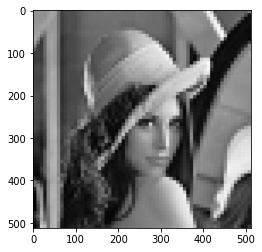

In [ ]:
new_image=np.zeros([512,512])
s=0
for i in range(0,512,step):
    for j in range(0,512,step):
        new_image[i:i+step,j:j+step]=X[s].reshape(8,8)
        s+=1
print(new_image)
plt.imshow(new_image,cmap="gray")
plt.savefig('new_pic.png',dpi=600)